In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/nfl_games.csv')

In [3]:
df.head(10)

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0
5,1920-10-03,1920,0,0,CHI,MUT,1368.333,1300.000,0.682986,20,0,1.0
6,1920-10-03,1920,0,0,CBD,PTQ,1504.688,1300.000,0.825267,48,0,1.0
7,1920-10-03,1920,0,0,BFF,WBU,1478.004,1300.000,0.802000,32,6,1.0
8,1920-10-10,1920,0,0,CBD,TLM,1516.803,1300.000,0.835097,42,0,1.0
9,1920-10-10,1920,0,0,BFF,ABU,1489.757,1292.486,0.819025,51,0,1.0


In [4]:
df.dtypes

date          object
season         int64
neutral        int64
playoff        int64
team1         object
team2         object
elo1         float64
elo2         float64
elo_prob1    float64
score1         int64
score2         int64
result1      float64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.tail(10)

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
15997,2018-01-06,2017,0,1,LAR,ATL,1568.454281,1637.546861,0.494111,13,26,0.0
15998,2018-01-07,2017,0,1,JAX,BUF,1515.498649,1517.408642,0.589809,10,3,1.0
15999,2018-01-07,2017,0,1,NO,CAR,1624.706449,1584.517593,0.646917,31,26,1.0
16000,2018-01-13,2017,0,1,PHI,ATL,1646.760562,1663.578159,0.568899,15,10,1.0
16001,2018-01-13,2017,0,1,NE,TEN,1737.008571,1499.361184,0.850964,35,14,1.0
16002,2018-01-14,2017,0,1,PIT,JAX,1664.251810,1532.082440,0.756760,42,45,0.0
16003,2018-01-14,2017,0,1,MIN,NO,1667.692214,1636.781874,0.634624,29,24,1.0
16004,2018-01-21,2017,0,1,NE,JAX,1745.107927,1555.129851,0.812718,24,20,1.0
16005,2018-01-21,2017,0,1,PHI,MIN,1661.878061,1680.238577,0.566719,38,7,1.0
16006,2018-02-04,2017,1,1,NE,PHI,1750.510171,1691.287319,0.584413,33,41,0.0


# Visualization 

Let's look at the number of wins per team at home

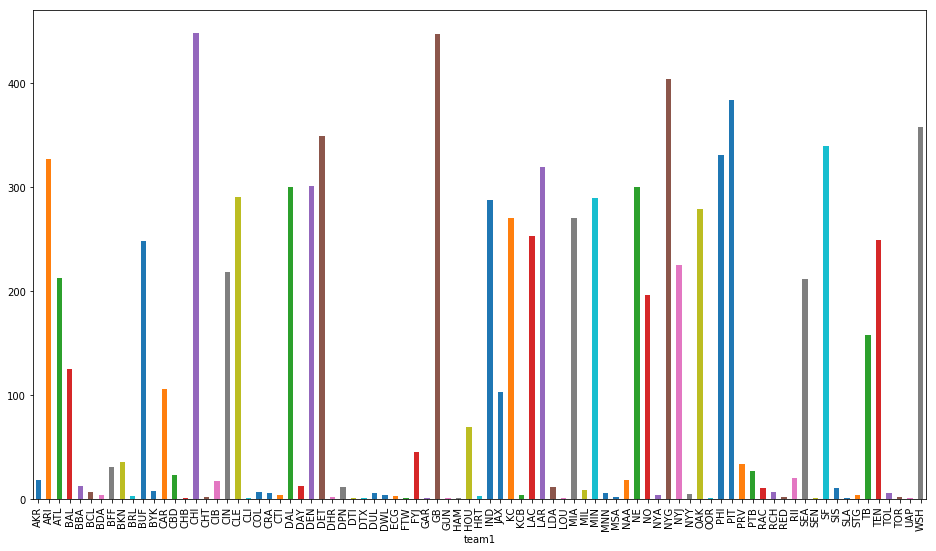

In [7]:
df.loc[df['result1'] == 1].groupby('team1')['result1'].count().plot(kind='bar', figsize=(16,9))

In [8]:
len(df.team1.unique())

101

Because this data is very old, from 1920, there a lot more teams (101) than there are in the modern NFL (32). For the sake of this notebook we will just take data from 1971 onwards to keep it modern

In [9]:
df = df.loc[df['season'] >= 1970]

In [10]:
len(df.team1.unique())

32

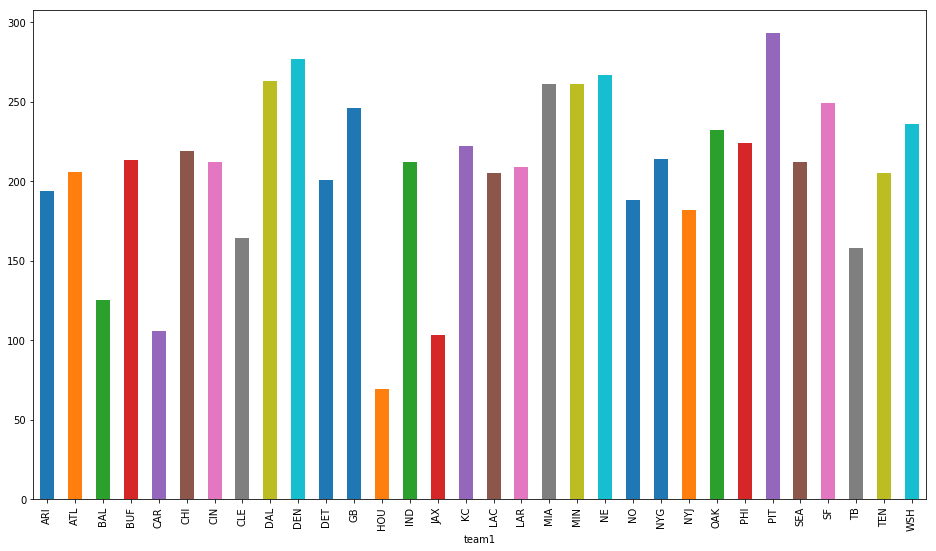

In [11]:
df.loc[df['result1'] == 1].groupby('team1')['result1'].count().plot(kind='bar', figsize=(16,9))

Let's look at wins on the road

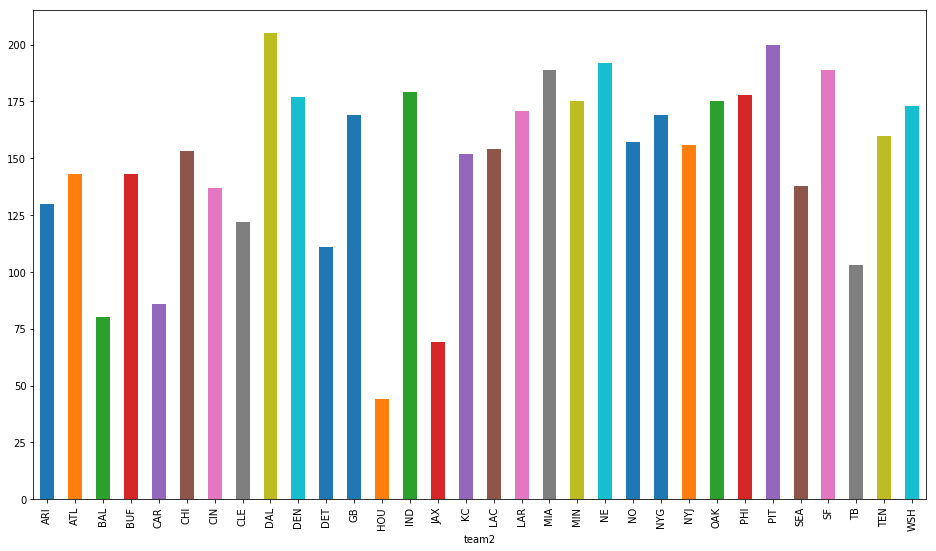

In [12]:
df.loc[df['result1'] == 0].groupby('team2')['result1'].count().plot(kind='bar', figsize=(16,9))

Next, let's look at Elo scores for teams at home

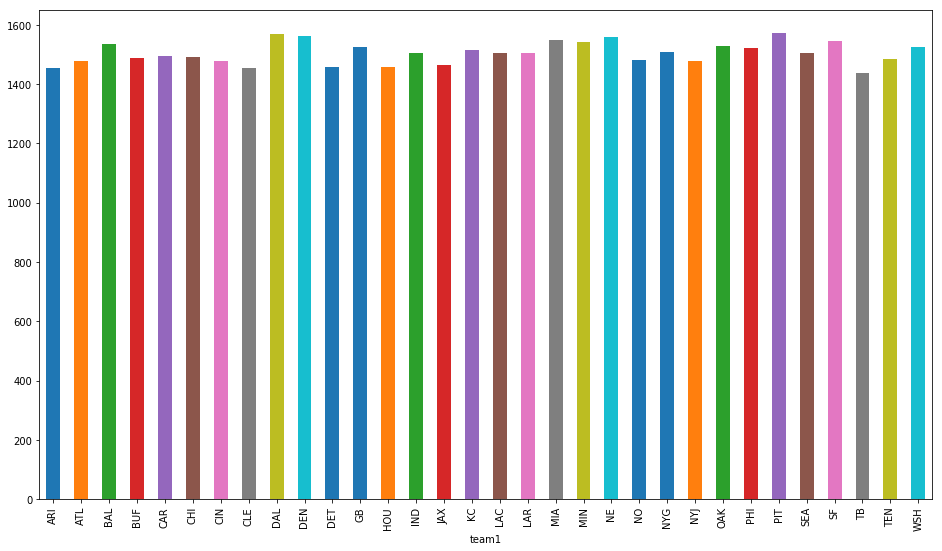

In [13]:
df.groupby('team1')['elo1'].mean().plot(kind='bar', figsize=(16,9))

Elo scores are actually fairly consistent across teams when they're at home

Let's look at the data of one team, the Chiefs for example

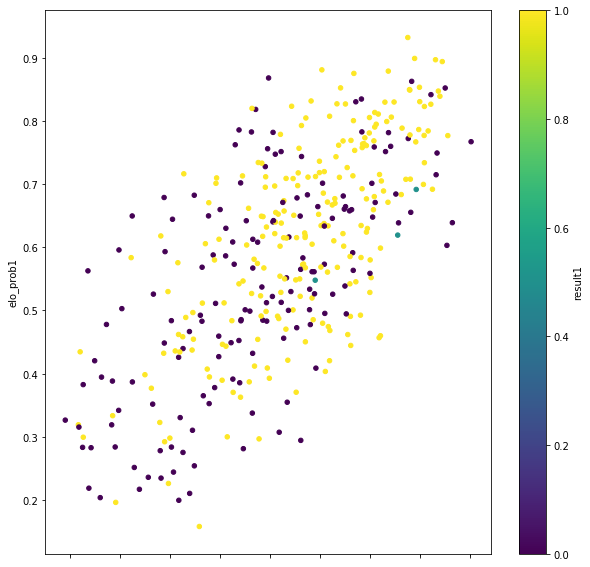

In [14]:
df.loc[df['team1'] == 'KC'].plot.scatter(x='elo1', y='elo_prob1', c='result1', colormap='viridis', figsize=(10,10))

This is actually very strange. As the elo and eloprob both increase, the likelihood of winning only seem to slightly increase. As we see the ratio of concentration of yellow to purple dots doesn't really change much. Let's look at it for all teams.

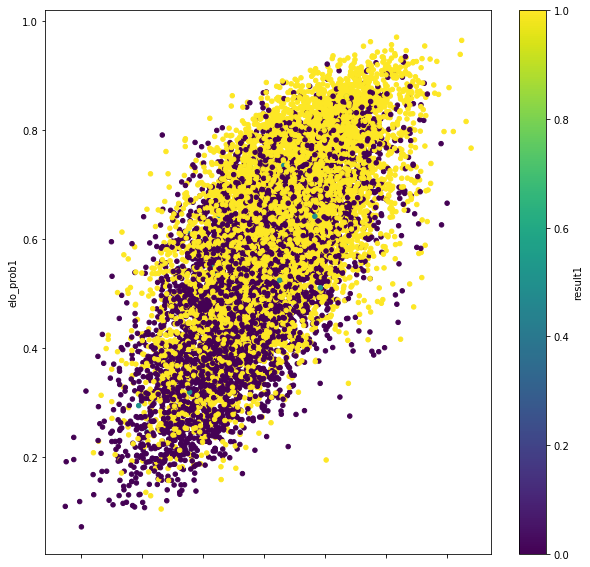

In [15]:
df.plot.scatter(x='elo1', y='elo_prob1', c='result1', colormap='viridis', figsize=(10,10))

Well its much better using the entire data set rather than one team. Hmmm. The Chiefs might want to look at this notebook @PatrickMahomes @AndyReid

# Models

We need to encode the values of teams first

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['team1'])
df['team1'] = le.transform(df['team1'])
df['team2'] = le.transform(df['team2'])
le.fit(df['result1'])
df['result1'] = le.transform(df['result1'])

In [17]:
df.head(20)

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
4549,1970-09-18,1970,0,0,17,0,1583.202,1426.127,0.782172,34,13,2
4550,1970-09-19,1970,0,0,22,5,1475.119,1382.173,0.712839,16,24,0
4551,1970-09-20,1970,0,0,16,13,1522.059,1586.888,0.500246,14,16,0
4552,1970-09-20,1970,0,0,6,24,1396.972,1638.776,0.265463,31,21,2
4553,1970-09-20,1970,0,0,28,31,1458.876,1488.866,0.550214,26,17,2
4554,1970-09-20,1970,0,0,25,8,1397.834,1586.774,0.328836,7,17,0
4555,1970-09-20,1970,0,0,3,9,1386.799,1436.731,0.521671,10,25,0
4556,1970-09-20,1970,0,0,11,10,1541.903,1563.539,0.562084,0,40,0
4557,1970-09-20,1970,0,0,19,15,1640.706,1685.241,0.529417,27,10,2
4558,1970-09-20,1970,0,0,21,1,1418.525,1484.728,0.498269,3,14,0


In [18]:
from sklearn.model_selection import train_test_split
X = df[['season', 'neutral', 'playoff', 'team1','team2','elo1','elo2', 'elo_prob1','score1','score2']]
y = df[['score1', 'score2']]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
y_pred = dt.predict(X_test)
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.06500872600349039
Mean Squared Error: 0.13089005235602094
Root Mean Squared Error: 0.36178730264621084


In [21]:
y_pred

array([[20., 17.],
       [23.,  9.],
       [30.,  0.],
       ...,
       [31., 37.],
       [20., 23.],
       [30., 28.]])

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = rfr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07489092495636983
Mean Squared Error: 0.07517670157068077
Root Mean Squared Error: 0.274183700410292


In [24]:
y_pred

array([[20. , 17. ],
       [23.9,  9. ],
       [29.9,  0. ],
       ...,
       [31.4, 37. ],
       [20. , 23. ],
       [29.9, 28. ]])

In [25]:
from sklearn import linear_model
lmr = linear_model.LinearRegression()
lmr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
y_pred = lmr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.0424631222558067e-14
Mean Squared Error: 8.19112008797791e-28
Root Mean Squared Error: 2.862013292767508e-14


In [27]:
y_pred

array([[ 2.00000000e+01,  1.70000000e+01],
       [ 2.40000000e+01,  9.00000000e+00],
       [ 3.00000000e+01, -5.69118937e-15],
       ...,
       [ 3.10000000e+01,  3.70000000e+01],
       [ 2.00000000e+01,  2.30000000e+01],
       [ 3.00000000e+01,  2.80000000e+01]])

I used three different regression models: Decision Tree, Random Forest, and Linear. I used multiclass regression to predict both scores, we can use that data to also do correlations in the future. We got very good RMSE values all under < 0.5. I'd call this a decent success.